In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install causalinference

In [3]:
data=pd.read_csv('jobs.csv')

In [4]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


In [5]:
df=data.copy()

In [6]:
#Defining the features and the target variable
features = data.loc[:, data.columns != 'y']
target= data['y'] 

# 3(b)

In [7]:
#Splitting the dataset into training(70%), validation(20%) and testing(10%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

def show_result(model_name, actual_value, predicted_value):
    print(model_name)
    print("accuracy: {}".format(accuracy_score(actual_value, predicted_value)))
    print("precision: {}".format(precision_score(actual_value, predicted_value)))
    print("recall: {}".format(recall_score(actual_value, predicted_value)))
    print("f1: {}".format(f1_score(actual_value, predicted_value)))

In [10]:
def print_report(y_train, X_train, model):
    probs = np.array([x[-1] for x in model.predict_proba(X_train)])
    print('The roc_auc score is {}'.format(roc_auc_score(y_train, probs).round(4)))
    print('confusion matrix:')
    print(confusion_matrix(y_train, model.predict(X_train)))
    print('classification report:')
    print(classification_report(y_train, model.predict(X_train)))

# Random forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth= 10,random_state=0,class_weight="balanced") 
# training the model
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

# 3(c)

In [12]:
print_report(y_test, X_test, clf)

The roc_auc score is 0.833
confusion matrix:
[[ 19  18]
 [ 25 260]]
classification report:
              precision    recall  f1-score   support

         0.0       0.43      0.51      0.47        37
         1.0       0.94      0.91      0.92       285

    accuracy                           0.87       322
   macro avg       0.68      0.71      0.70       322
weighted avg       0.88      0.87      0.87       322



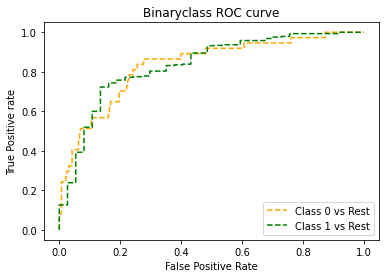

In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
pred_prob_dt = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 2


for i in range(n_class):    
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
  # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Binaryclass ROC',dpi=300);    

# 3(d) and (e)

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [90,100,110,120,130],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 6, 10],
}

clf_new = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
clf_new.fit(X_train, y_train)

print('The best roc_auc: {:.3}, with the best value of C: {}'.format(clf_new.best_score_, clf_new.best_params_))

The best roc_auc: 0.864, with the best value of C: {'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 110}


In [15]:
clf_updated = RandomForestClassifier(max_features= "auto", min_samples_split= 2, n_estimators= 110,class_weight="balanced") 
# training the model
clf_updated.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=110)

In [16]:
print_report(y_test, X_test, clf_updated)

The roc_auc score is 0.7588
confusion matrix:
[[ 12  25]
 [ 16 269]]
classification report:
              precision    recall  f1-score   support

         0.0       0.43      0.32      0.37        37
         1.0       0.91      0.94      0.93       285

    accuracy                           0.87       322
   macro avg       0.67      0.63      0.65       322
weighted avg       0.86      0.87      0.86       322



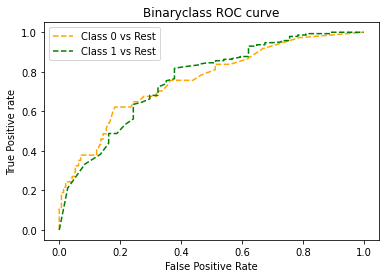

In [17]:
pred_prob_dt = clf_updated.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
n_class = 2


for i in range(n_class):    
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
  # plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Binaryclass ROC',dpi=300);  

# 3(f)

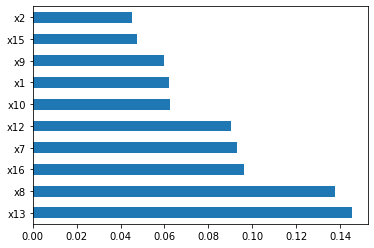

<Figure size 432x288 with 0 Axes>

In [18]:
feature_importance=pd.Series(clf_updated.feature_importances_,index=features.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()
plt.savefig('feature_importance_jobs.png')

# 4(a)

In [19]:
TREATMENT = 't'
OUTCOME = 'y'
data.groupby(TREATMENT)[OUTCOME].describe()

,count,mean,std,min,25%,50%,75%,max
t,,,,,,,,
0.0,2915.0,0.857633,0.349486,0.0,1.0,1.0,1.0,1.0
1.0,297.0,0.774411,0.418675,0.0,1.0,1.0,1.0,1.0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
from causalinference import CausalModel

In [21]:
from sklearn.linear_model import LogisticRegression
t = data[TREATMENT]
X = pd.get_dummies(data.drop(columns=[OUTCOME, TREATMENT]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression(C=1e6))
])
pipe.fit(X, t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression(C=1000000.0))])

In [22]:
predictions = pipe.predict_proba(X)
predictions_binary = pipe.predict(X)

In [23]:
print('Accuracy: {:.4f}\n'.format(accuracy_score(t, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(confusion_matrix(t, predictions_binary)))
print('F1 score is: {:.4f}'.format(f1_score(t, predictions_binary)))
print('precision score is: {:.4f}'.format(precision_score(t, predictions_binary)))
print('recall score is: {:.4f}'.format(recall_score(t, predictions_binary)))

Accuracy: 0.9082

Confusion matrix:
[[2873   42]
 [ 253   44]]

F1 score is: 0.2298
precision score is: 0.5116
recall score is: 0.1481


# 4(b)

In [24]:
import math

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value


predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])


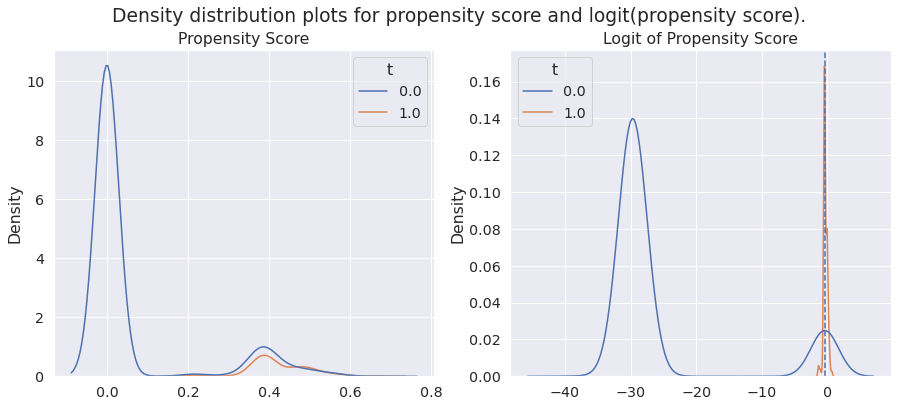

In [25]:
sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.3)
fig, ax = plt.subplots(1,2)
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = t , ax = ax[0])
ax[0].set_title('Propensity Score')
sns.kdeplot(x = predictions_logit, hue = t , ax = ax[1])
ax[1].axvline(-0.4, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [26]:
common_support = (predictions_logit > -10) & (predictions_logit < 10)


In [27]:
data.loc[:,'propensity_score'] = predictions[:,1]
data.loc[:,'propensity_score_logit'] = predictions_logit
data.loc[:,'outcome'] = target

X.loc[:,'propensity_score'] = predictions[:,1]
X.loc[:,'propensity_score_logit'] = predictions_logit
X.loc[:,'outcome'] = target
X.loc[:,'treatment'] = data.t

In [28]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,t,y,e,propensity_score,propensity_score_logit,outcome
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,...,0.0,0.0,2.843909,0.0,0.0,1.0,0.0,2.427763e-13,-29.046636,1.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,...,0.0,0.0,0.038422,0.0,0.0,1.0,0.0,1.463606e-13,-29.552703,1.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,...,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0,7.936031e-14,-30.164778,1.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,...,0.0,0.0,0.173108,0.0,0.0,1.0,1.0,3.812975e-01,-0.484045,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,...,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0,8.919792e-14,-30.047919,1.0


In [29]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,e,propensity_score,propensity_score_logit,outcome,treatment
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,...,2.937244,0.0,0.0,2.843909,0.0,0.0,2.427763e-13,-29.046636,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,...,0.082537,0.0,0.0,0.038422,0.0,0.0,1.463606e-13,-29.552703,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,...,-0.303615,0.0,0.0,-0.191304,0.0,0.0,7.936031e-14,-30.164778,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,...,-0.039630,0.0,0.0,0.173108,0.0,1.0,3.812975e-01,-0.484045,1.0,0.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,...,-0.331552,0.0,0.0,-0.779227,0.0,0.0,8.919792e-14,-30.047919,1.0,0.0


In [30]:
weight_t = 1/data.query("t==1")["propensity_score"]
weight_nt = 1/(1-data.query("t==0")["propensity_score"])
print("Original Sample Size", data.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 3212
Treated Population Sample Size 721.9759153940039
Untreated Population Sample Size 3212.2006269892477


In [31]:
weight = ((data["t"]-data["propensity_score"]) /
          (data["propensity_score"]*(1-data["propensity_score"])))

y1 = sum(data.query("t==1")["y"]*weight_t) / len(data)
y0 = sum(data.query("t==0")["y"]*weight_nt) / len(data)

ate = np.mean(weight * data["y"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data["y"]))

Y1: 0.17335941588172932
Y0: 0.8430071581705095
ATE -0.6696477422887889


# 4(c)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

In [33]:
w = {0:1, 1:99}
# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('F1 score is: {:.4f}'.format(f1_score(y_test,y_pred)))

print('precision score is: {:.4f}'.format(precision_score(y_test,y_pred)))
print('recall score is: {:.4f}'.format(recall_score(y_test,y_pred)))

Accuracy Score: 0.8850931677018633
Confusion Matrix: 
[[  0  37]
 [  0 285]]
Area Under Curve: 0.5
F1 score is: 0.9390
precision score is: 0.8851
recall score is: 1.0000


In [34]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [35]:
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.825671052631579 with param: {'class_weight': {0: 1000, 1: 100}}


In [36]:
# define model
lg3 = LogisticRegression(random_state=42, class_weight={0: 1000, 1: 100})
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print('precision score is: {:.4f}'.format(precision_score(y_test,y_pred)))
print('f1 score is: {:.4f}'.format(f1_score(y_test,y_pred)))

Accuracy Score: 0.6956521739130435
Confusion Matrix: 
[[ 34   3]
 [ 95 190]]
Area Under Curve: 0.7927927927927927
Recall score: 0.6666666666666666
precision score is: 0.9845
f1 score is: 0.7950


# 5(a,b,c)

In [37]:
!pip install dowhy

In [38]:
from dowhy import CausalModel
from IPython.display import Image, display

In [39]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 't', 'y', 'e'],
      dtype='object')

In [40]:
df.dtypes

x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
t      float64
y      float64
e      float64
dtype: object

In [41]:
treatment = 't'
outcome = 'y'

features = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11",
       "x12", "x13", "x14", "x15", "x16", "x17"]


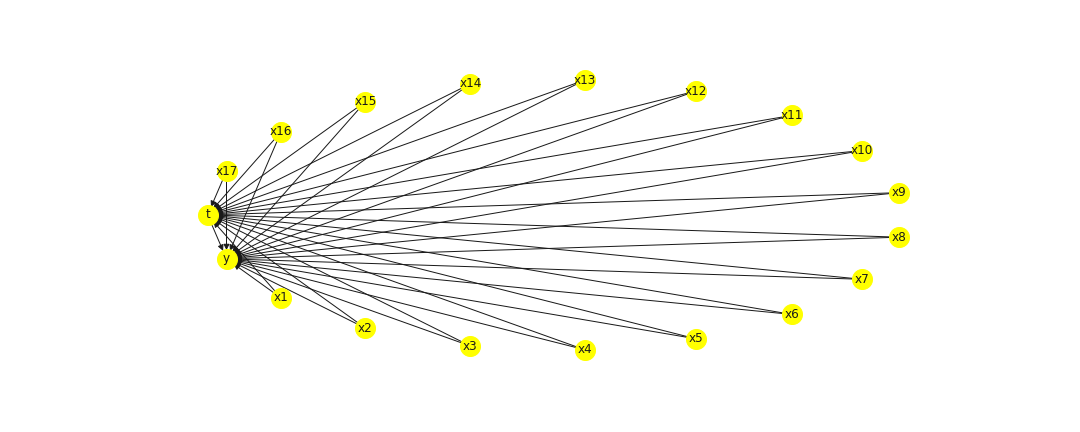

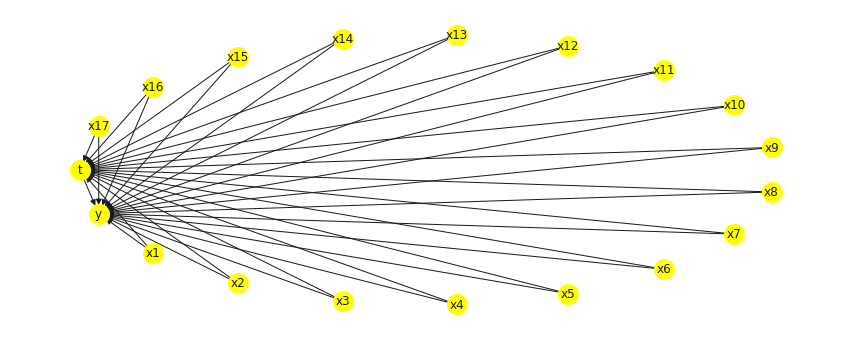

In [42]:
model = CausalModel(
    data=df,
    treatment=treatment, 
    outcome=outcome, 
    common_causes=features, 
    instruments=None, 
    effect_modifiers=None)

model.view_model()
display(Image(filename="causal_model.png"))

In [43]:

# split data into train and test sets 
train, test = train_test_split(df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=features, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[features]
W = None
X_test = test[features]

In [44]:
!pip install econml

In [45]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)


# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)

In [46]:
effects_train = causal_forest.effect(X)
effects_test = causal_forest.effect(X_test)
conf_intrvl = causal_forest.effect_interval(X_test)

In [47]:
effects_test

array([-2.48724088e-02, -4.10752304e-02, -2.67336641e-02, -3.46144851e-03,
        7.23603099e-02,  3.34997158e-01,  2.15333439e-02, -9.76797142e-02,
       -1.86585992e-02,  2.72372469e-02, -1.84860501e-01, -1.75241923e-02,
       -8.83748310e-01, -1.12298773e-01, -6.95781061e-02,  6.08064050e-02,
        1.10218127e-01,  6.70108973e-02, -1.93037785e-02,  3.23882059e-01,
        8.93690783e-03, -1.87656427e-01, -1.98168209e-01, -5.72936945e-02,
       -7.85051511e-02, -1.62346177e-01, -3.89545198e-01, -3.51845932e-02,
       -6.86137459e-03, -4.26778496e-01, -1.34562934e-01, -9.69608158e-02,
       -3.62379724e-01,  6.51709102e-02,  6.49255819e-03, -1.36097467e-01,
       -4.23382702e-02,  4.98929952e-02, -2.08714977e-02, -1.12387365e-01,
       -7.13254702e-02,  2.59439806e-01,  5.57922774e-03, -3.74531924e-02,
        4.07840400e-01,  1.42170981e-01, -1.55371436e-02,  3.95102718e-02,
       -3.40306960e-02,  3.57066448e-02, -4.43344610e-02, -7.43009271e-02,
       -2.08487834e-01, -